<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/FujiShimoyamaProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Data visualization

Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.
If you look at this cross section, you can easily see the low place, but this time I imagine a situation where only the slope of your feet is known in the dark.

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


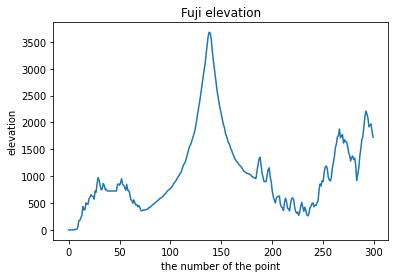

In [5]:
import numpy as np
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv" # Specify the file name (path)
np.set_printoptions(suppress=True) # 
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji)

# Display the graph. Title and axis label name.
x_data = fuji[:,0]
y_data = fuji[:,3]
plt.title("Fuji elevation")
plt.xlabel("the number of the point")
plt.ylabel("elevation")
plt.plot(x_data, y_data)
plt.show()

[Problem 2] Create a function to calculate the gradient at a certain point

In "Two-dimensional array and gradient problem", the gradient at each point was calculated first. However, if you imagine Mt. Fuji in the dark, you can only know the slope of your current location.

Create a function to find the gradient by the relationship between "the number of the current point" and "the number of the next point you are now (number of the current point-1)".

The gradient was calculated by the following formula, but in this data, "elevation" corresponds to y and "the number of that point" corresponds to x.

In [6]:
def find_current_gradient(x_data,y_data,current_point):

  x1 = x_data[current_point]
  x2 = x_data[current_point - 1]
  y1 = y_data[current_point]
  y2 = y_data[current_point - 1]

  y_change = y1 - y2
  x_change = x1 - y2
  gradient = y_change / x_change
  return gradient

current_point_gradient = find_current_gradient(x_data, y_data, 150)
current_point_gradient

0.04541889448966504

[Problem 3] Create a function to calculate the destination point

Create a function that calculates the next point to move to based on the information on the slope of the current point.

In [11]:
# Create a function to calculate the destination point

def destination_point(current_point,current_point_gradient, Alpha=0.2):
  destination_point = int(current_point - (Alpha*current_point_gradient))

  return destination_point
point = destination_point(150, current_point_gradient,Alpha=0.2)
point

149

[Problem 4] Create a function to go down the mountain

Create a function that goes down the mountain. Receive the first point and update the point with the function in Problem 3. Record the points for each move in a list, etc., and use this as the return value of the function.

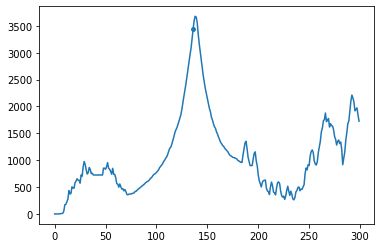

In [16]:
def compute_path(y_data, current_point, x_data, alpha=0.2):
    grad = y_data[current_point]-y_data[current_point-1]
    update_y = [y_data[current_point]]
    update_point = [current_point]
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data)

    if grad < 0:
        while grad < 0:
            grad = find_current_gradient(x_data, y_data, current_point)
            current_point = destination_point(current_point,grad,alpha)

            update_y.append(y_data[current_point])
            update_point.append(current_point)  

            ax.scatter(current_point, y_data[current_point], s=15)
            ax.plot([update_point[-1],update_point[-2]], [update_y[-1],update_y[-2]], color = 'red')
            #plt.pause(1)
            plt.show()
    else:
       while grad > 0:
            grad = find_current_gradient(x_data, y_data, current_point)
            current_point = destination_point(current_point,grad,alpha)

            update_y.append(y_data[current_point])
            update_point.append(current_point)  

            ax.scatter(current_point, y_data[current_point], s=15)
            ax.plot([update_point[-1],update_point[-2]], [update_y[-1],update_y[-2]], color = 'red')
            #plt.pause(1)
            plt.show()
    return update_y, update_point

path = []
path_index = []
current_point = int(x_data[136])
alpha = 0.2

path, path_index = compute_path(y_data, current_point, x_data, alpha)


[Problem 5] Visualization of the descent process

Visualize the descending process in Problem 4 with a graph using Matplotlib.

<< Visualization example >>

- Display points moved in the cross section as dots
- Make a line graph of altitude and slope for each repetition

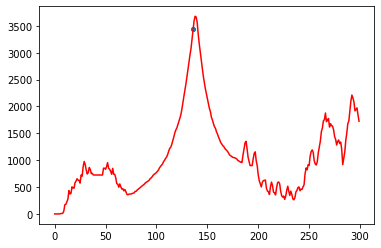

In [17]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

[Problem 6] Change of initial value

In Question 4, we fixed the first "where we are" to 136, but calculate this at all other points. Specifically, it means being able to change the "current location".

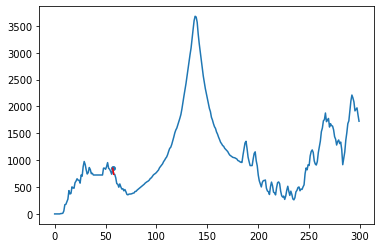

In [19]:
path = []
path_index = []

point = 58
current_point = int(x_data[point])
alpha = 0.2
path, path_index = compute_path(y_data, current_point, x_data, alpha)

[Problem 7] Visualization of the descent process for each initial value

In Problem 6, we calculated the descending process of all initial values. Therefore, please visualize what kind of descent process will be for some initial values as in Problem 5. It can be confirmed that the initial value affects the result in the gradient descent method.

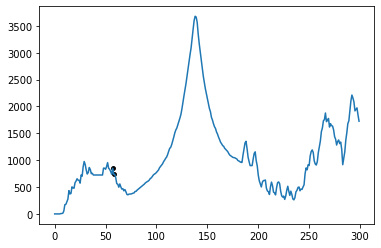

In [22]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data)
ax.scatter(path_index, path, s=15, color='black')
plt.show()

[Problem 8] (Advance problem) Hyperparameter changes

Visualize what kind of descent process will occur if you change the hyperparameter $ \ alpha $, as in problem 5. And make sure that the hyperparameters make a big difference in the results.

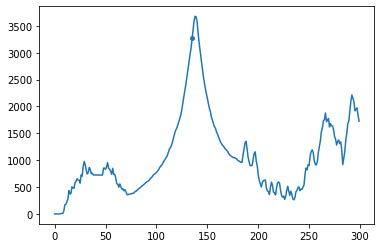

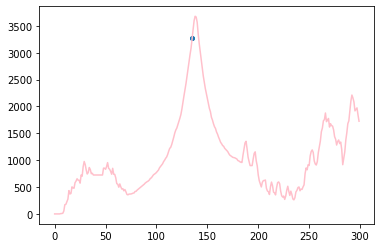

In [24]:
path = []
path_index = []
current_point = int(x_data[135])
alpha = 0.1

path, path_index = compute_path(y_data, current_point, x_data, alpha)
fig, ax = plt.subplots()
ax.plot(x_data, y_data, color='pink')
ax.scatter(path_index, path, s=15)
plt.show()